## Hi there I am `Hamza Shafiq` 👋
### Check [My Portfolio](https://github.com/hamza811998/Portfolio)
#### **You can reach me at:**
[Github](https://github.com/hamza811998), [Kaggle](https://www.kaggle.com/hamza811998), [LinkedIn](https://www.linkedin.com/in/hamza811998/), [Facebook](https://www.facebook.com/hamza811998/), [Twitter](https://twitter.com/hamza811998), [Instagram](https://www.instagram.com/hamza811998/)
#### **Place your Orders at:** [Fiverr](https://www.fiverr.com/s/agNoNQ)
- **Email**: [hamza811998shafiq@gmail.com](hamza811998shafiq@gmail.com)

# Interactive Recommendation System with Word Embeddings using Word2Vec, Plotly, and NetworkX
Welcome to this project! We will be exploring how to build a model that can understand words in a mathematical way, such that words with similar meaninings that share certain charactertics belong close to each other in vector space. That's a fancy way of saying that the mathemical representations for words that have some similar meaning are close to each other, and words that don't share a lot of meaning are further apart. We will show that this model can be adapted to be used in a recommendation system, or as a discovery tool (i.e. we don't have this in stock, maybe you'd like this alternative?).

## Prerequisites
- Basic-to-intermediate level understanding of Python (list comprehensions, dictionary structure, etc.).
- Understanding of basic mathematical principles (what a vector is, for example).
- Basic understanding of machine learning, although we will go over and introduce a lot at a beginner-level.

## Project Breakdown
- Task 1: Introduction (you are here)
- Task 2: Exploratory Data Analysis and Preprocessing
- Task 3: Word2Vec with Gensim
- Task 4: Exploring Results
- Task 5: Building and Visualizing Interactive Network Graph

## `Task 1:` Introduction
We will be using a recipe dataset, to train a model to learn the interactions between different kind of ingredients and available products in a supermarket. This model can then be implemented in a number of different ways, for example,
- to recommend products based on items added to cart;
- to offer alternatives products based on stock;
- to discover new products to create different recipes.


### Sample
*Herb Rubbed Sirloin Tip Roast*

- 1 1/4 tablespoons paprika
- 1 tablespoon kosher salt
- 1 teaspoon garlic powder
- 1/2 teaspoon ground black pepper
- 1/2 teaspoon onion powder
- 1/2 teaspoon ground cayenne pepper
- 1/2 teaspoon dried oregano
- 1/2 teaspoon dried thyme
- 2 tablespoons olive oil
- 1 (3 pound) sirloin tip roast

In a small bowl, mix the paprika, kosher salt, garlic powder, black pepper, onion powder, cayenne pepper, oregano, and thyme. Stir in the olive oil, and allow the mixture to sit about 15 minutes.

Preheat oven to 350 degrees F (175 degrees C). Line a baking sheet with aluminum foil.

Place the roast on the prepared baking sheet, and cover on all sides with the spice mixture.

Roast 1 hour in the preheated oven, or to a minimum internal temperature of 145 degrees F (63 degrees C). Let sit 15 minutes before slicing.

## `Task 2:` Exploratory Data Analysis and Preprocessing

[This is the dataset](https://eightportions.com/datasets/Recipes/#fn:1) we will be using. It is collated by Ryan Lee, sourced from [Food Network](https://www.foodnetwork.com/), [Epicurious](https://www.epicurious.com/), and [Allrecipes](https://www.allrecipes.com/).

In [1]:
from gensim.parsing.preprocessing import remove_stopwords
from tqdm import tqdm
import pandas as pd
import pickle
import string
import json

In [2]:
recipe_sources = ['ar', 'epi', 'fn']

In [3]:
temp = json.load(open('Data/Dataset/recipes_raw_nosource_ar.json'))

In [4]:
df = pd.DataFrame()
sources, titles, ingredients, instructions = [], [], [], []
for recipe_source in recipe_sources:
    data = json.load(open(f'Data/Dataset/recipes_raw_nosource_{recipe_source}.json', 'r'))
    for _, recipe in data.items():
        if ('title' in recipe) and ('ingredients' in recipe) and ('instructions' in recipe):
            # append to a list of the source
            sources.append(recipe_source)
            # append to a list of the titles
            titles.append(recipe['title'])
            # append to a list of the ingredients, removing the word ADVERTISEMENT
            ingredients.append([str(ingredient).replace('ADVERTISEMENT', '') for ingredient in recipe['ingredients']])
            # append to a list of the instructions, removing the word ADVERTISEMENT and replace in with space
            instructions.append(str(recipe['instructions']).replace('ADVERTISEMENT', '').replace('\n', ' '))
            
df['source'] = sources
df['title'] = titles
df['ingredients'] = ingredients
df['instructions'] = instructions

In [5]:
df.head()

,source,title,ingredients,instructions
0,ar,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves , ...","Place the chicken, butter, soup, and onion in ..."
1,ar,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ..."
2,ar,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar , 1/2 cup ketchup ...",Preheat oven to 350 degrees F (175 degrees C)....
3,ar,Best Chocolate Chip Cookies,"[1 cup butter, softened , 1 cup white sugar , ...",Preheat oven to 350 degrees F (175 degrees C)....
4,ar,Homemade Mac and Cheese Casserole,"[8 ounces whole wheat rotini pasta , 3 cups fr...",Preheat oven to 350 degrees F. Line a 2-quart ...


In [6]:
to_remove = [
    'tablespoon',
    'tablespoons',
    'teaspoon',
    'teaspoons',
    'tsp',
    'tsps',
    'tbsp',
    'tbsps',
    'pound',
    'pounds',
    'grams',
    'mg',
    'ounce'
    'ounces',
    'kg',
    'crushed',
    'chopped',
    'finely',
    'softened',
    'cups',
    'cup'
]

translation_table = str.maketrans('', '', string.punctuation+string.digits)

In [7]:
def preprocess(items):
    res = []
    for i, item in enumerate(tqdm(items)):
        temp = item.lower().replace('-', ' ')
        temp = temp.translate(translation_table)
        temp = remove_stopwords(temp)
        for stop_word in to_remove:
            temp = temp.replace(stop_word, '')
        res.append(temp.split())
    return res

In [8]:
instructions = df.instructions.values.tolist()
ingredients = [', '.join(x) for x in df.ingredients.values]

In [9]:
train_data = preprocess(instructions+ingredients)

  1%|▏         | 3311/249294 [00:00<00:37, 6627.88it/s]

100%|██████████| 249294/249294 [00:28<00:00, 8848.93it/s] 


In [10]:
with open('Data/train_data.pkl', 'wb') as f:
    pickle.dump(train_data, f)

## `Task 3:` Word2Vec with Gensim
Word2Vec original papers can be found [here](https://arxiv.org/pdf/1301.3781.pdf) and [here](https://arxiv.org/pdf/1310.4546.pdf), while the documentation for the Gensim model can be found [here](https://radimrehurek.com/gensim/models/word2vec.html).

![Word2Vec architecture](Data/word2vec.jpeg)

In [11]:
from gensim.models.word2vec import Word2Vec
from tqdm import tqdm
import pandas as pd
import pickle

In [12]:
with open('Data/train_data.pkl', 'rb') as f:
    train_data = pickle.load(f)

In [13]:
train_data[0]

['place',
 'chicken',
 'butter',
 'soup',
 'onion',
 'slow',
 'cooker',
 'water',
 'cover',
 'cover',
 'cook',
 'hours',
 'high',
 'minutes',
 'serving',
 'place',
 'torn',
 'biscuit',
 'dough',
 'slow',
 'cooker',
 'cook',
 'dough',
 'longer',
 'raw',
 'center']

In [14]:
model = Word2Vec()

In [15]:
# model?

In [16]:
model.build_vocab(train_data)

In [17]:
%%time
model.train(train_data, total_examples=model.corpus_count, epochs=model.epochs)

CPU times: total: 3min 33s
Wall time: 1min 42s


(68100871, 81403200)

In [18]:
res = model.wv.most_similar('lemon chicken garlic onion'.split(), topn=20)
res

[('shallot', 0.6466253995895386),
 ('shallots', 0.6086664199829102),
 ('onions', 0.5602028369903564),
 ('curry', 0.5023986101150513),
 ('cumin', 0.49848508834838867),
 ('scallions', 0.4918675422668457),
 ('chile', 0.48264995217323303),
 ('calamansi', 0.4755553603172302),
 ('jalapeno', 0.47523295879364014),
 ('oregano', 0.47481274604797363),
 ('pepper', 0.46921172738075256),
 ('parsley', 0.46896451711654663),
 ('paprika', 0.4664571285247803),
 ('tomatoes', 0.4663117825984955),
 ('tomato', 0.4567112326622009),
 ('jalapeño', 0.4550189971923828),
 ('turmeric', 0.45458534359931946),
 ('chili', 0.45320358872413635),
 ('thyme', 0.4515744745731354),
 ('lime', 0.4488259553909302)]

In [19]:
model.save('Data/w2v.model')

## `Task 4:` Exploring Results

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models.word2vec import Word2Vec
import numpy as np

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#matplotlib.rcParams['figure.dpi'] = 800
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import random
random.seed(3)

In [21]:
model = Word2Vec.load('Data/w2v.model')

In [22]:
inferred_vector = model.wv.most_similar('lemon chicken garlic onion'.split(), topn=20)
inferred_vector

[('shallot', 0.6466253995895386),
 ('shallots', 0.6086664199829102),
 ('onions', 0.5602028369903564),
 ('curry', 0.5023986101150513),
 ('cumin', 0.49848508834838867),
 ('scallions', 0.4918675422668457),
 ('chile', 0.48264995217323303),
 ('calamansi', 0.4755553603172302),
 ('jalapeno', 0.47523295879364014),
 ('oregano', 0.47481274604797363),
 ('pepper', 0.46921172738075256),
 ('parsley', 0.46896451711654663),
 ('paprika', 0.4664571285247803),
 ('tomatoes', 0.4663117825984955),
 ('tomato', 0.4567112326622009),
 ('jalapeño', 0.4550189971923828),
 ('turmeric', 0.45458534359931946),
 ('chili', 0.45320358872413635),
 ('thyme', 0.4515744745731354),
 ('lime', 0.4488259553909302)]

In [23]:
with open('Data/items_for_sale.txt') as f:
    items_for_sale = f.read().split('\n')

In [24]:
words, vectors = [], []
for item in items_for_sale:
    try:
        words.append(item)
        vectors.append(model.wv.get_vector(item))
    except KeyError:
        print(f'Word {item} not found in model!')

In [25]:
sims = cosine_similarity(vectors, vectors)

In [26]:
for i in range(len(vectors)):
    for j in range(len(vectors)):
        if i<=j:
            sims[i, j] = False

In [27]:
k = 20
indices = list(range(len(vectors)))
random.shuffle(indices)
indices = indices[120:120+k]

small_vectors = [vectors[i] for i in indices]
small_words = [words[i] for i in indices]

small_sims = cosine_similarity(small_vectors, small_vectors)

for x in range(len(small_sims)):
    small_sims[x, x] = 0

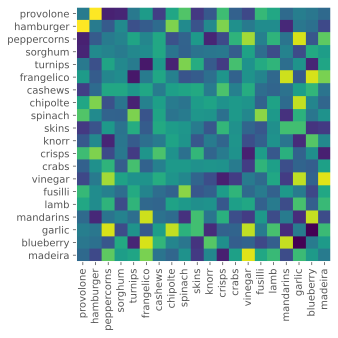

In [28]:
# adapted from https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html

fig, ax = plt.subplots()
im = ax.imshow(small_sims)

ax.set_xticks(np.arange(len(small_vectors)))
ax.set_yticks(np.arange(len(small_vectors)))

ax.set_xticklabels(small_words)
ax.set_yticklabels(small_words)
ax.grid(False)

plt.setp(ax.get_xticklabels(), rotation=90)

fig.tight_layout()
plt.savefig('plot2.png', dpi=300)
plt.show()

In [29]:
np.savetxt('Data/words.txt', words, fmt='%s')
np.save('Data/vectors.npy', vectors)

## `Task 5:` Building and Visualizing Interactive Network Graph
Let's see if we can visualize our results better!

In [30]:
from sklearn.metrics.pairwise import cosine_similarity
import plotly.graph_objects as go
from plotly.offline import plot
import networkx as nx
import numpy as np

In [31]:
words = np.loadtxt('Data/words.txt', dtype=str)
vectors = np.load('Data/vectors.npy')

In [32]:
sims = cosine_similarity(vectors, vectors)

In [33]:
for i in range(len(vectors)):
    for j in range(len(vectors)):
        if i<=j:
            sims[i, j] = False

In [34]:
indices = np.argwhere(sims > 0.65)

In [35]:
indices[0]

array([18, 16], dtype=int64)

In [36]:
G = nx.Graph()

for index in indices:
    G.add_edge(words[index[0]], words[index[1]], weight=sims[index[0], index[1]])

In [37]:
weight_values = nx.get_edge_attributes(G, 'weight')
weight_values[('egg', 'eggs')]

0.7853025

In [38]:
positions = nx.spring_layout(G)

In [39]:
nx.set_node_attributes(G, name='position', values=positions)

In [40]:
searches = []

In [41]:
edge_x = []
edge_y = []
weights = []
ave_x, ave_y = [], []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['position']
    x1, y1 = G.nodes[edge[1]]['position']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)
    ave_x.append(np.mean([x0, x1]))
    ave_y.append(np.mean([y0, y1]))
    weights.append(f'{edge[0]}, {edge[1]}: {weight_values[(edge[0], edge[1])]}')

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    opacity=0.7,
    line=dict(width=2, color='White'),
    hoverinfo='text',
    mode='lines')

edge_trace.text = weights


node_x = []
node_y = []
sizes = []
for node in G.nodes():
    x, y = G.nodes[node]['position']
    node_x.append(x)
    node_y.append(y)
    if node in searches:
        sizes.append(50)
    else:
        sizes.append(15)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        line=dict(color='White'),
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='Picnic',
        reversescale=False,
        color=[],
        opacity=0.9,
        size=sizes,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2
    )
)

invisible_similarity_trace = go.Scatter(
    x=ave_x, y=ave_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        color=[],
        opacity=0,
    )
)

invisible_similarity_trace.text=weights

In [42]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(adjacencies[0])

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [44]:
fig = go.Figure(
    data=[edge_trace, node_trace, invisible_similarity_trace],
    layout=go.Layout(
        title='Network Graph of Word Embeddings',
        template='plotly_dark',
        titlefont_size=20,
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20,l=5,r=5,t=40),
        annotations=[
            dict(
                text="Adapted from: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                showarrow=False,
                xref="paper", yref="paper",
                x=0.005, y=-0.002 ) 
        ],
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
    )
)

plot(fig)

'temp-plot.html'